# Probability Theory in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random  # Used for random number generation. 

import scipy.special  # Used for factorial calculations. 
import scipy.stats  # Used for distributions. 

## Ilustrate the Law of Large Numbers (LLN)  [Called "De relative frekvensernas stabilitet" in the book p.14]
1. Simulate 10000 dice throws. 
2. Plot the relative frequency of the number of times three dots occur for 1, 2, ..., 10000 throws.
3. To what number does the relative frequency converge to? What is the probability of getting three dots when throwing a dice? Do these two numbers coincide?
4. Explain what you observe. 

Make sure to create a good pedagogical plot, i.e. include title, x-label and y-label. 

**Hint: For step 1 use the random.choices() function. You should also create an empty list that you append with the relative frequencies for 1, 2, ... 10000 throws.**

In [2]:
# Help about the random.choices function
help(random.choices)

#print(random.choices([1, 2, 3, 4, 5, 6,], k=3))
#print(random.choices([1, 2, 3, 4, 5, 6,], k=10))

Help on method choices in module random:

choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.
    
    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.



Text(0, 0.5, 'Relative Frequency')

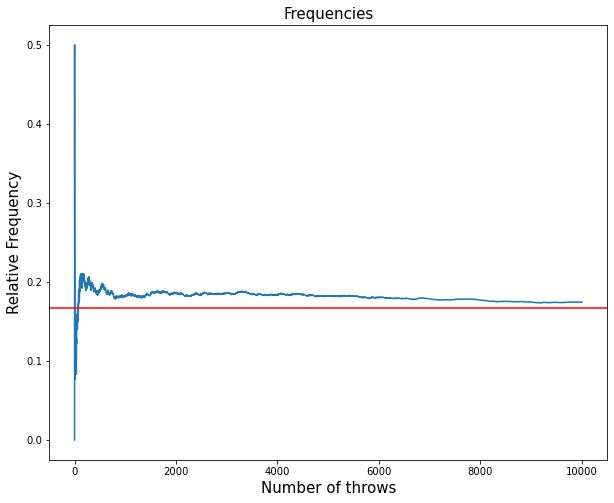

In [6]:
throws_outcome = []
rel_freq = []

for i in range(1,10001):
    throws = np.array(random.choices([1, 2, 3, 4, 5, 6], k = 1))
    #print(throws)
    throws_outcome.append(throws == 3)
    rel_freq.append(np.mean(throws_outcome))
    
fiq, ax = plt.subplots(figsize = (10,8))
ax.plot(rel_freq)
ax.axhline(1/6, color = 'r')
ax.set_title('Frequency Stability', size = 15)
ax.set_xlabel('Number of throws', size = 15)
ax.set_ylabel('Relative Frequency', size = 15)



# Solve exercise 105 in the book. 

Text(0, 0.5, 'Relative Frequency')

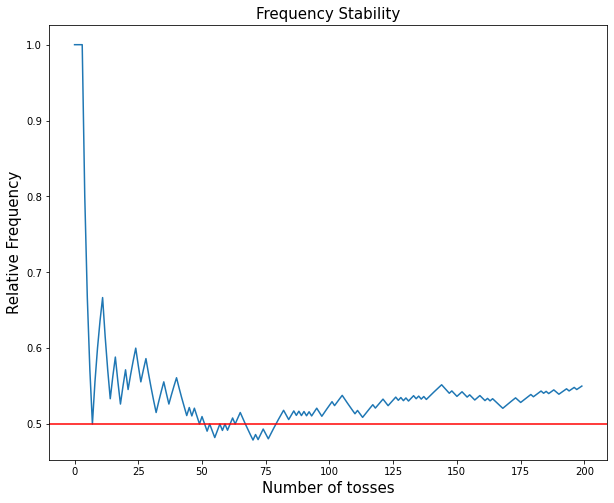

In [8]:
tosses_outcome = []
rel_freq1 = []

for i in range(1, 201):
    toss = np.array(random.choices([0, 1], k = 1))
    #print(toss)
    tosses_outcome.append(toss == 1)
    rel_freq1.append(np.mean(tosses_outcome))
    
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(rel_freq1)
ax.axhline(1/2, color = 'r')
ax.set_title('Frequency Stability', size = 15)
ax.set_xlabel('Number of tosses', size = 15)
ax.set_ylabel('Relative Frequency', size = 15)

# Calculate 1!, 2!, ..., 12! . What is your conclusion regarding the growth of the factorial function?

In [19]:
a = scipy.special.factorial(12)
print(a)

479001600.0


# We know that the binomial coefficients can be used to calculate the number of ways to choose k elements from n without replacement when the order does not matter. We have the formula: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ .

# Now calculate $\binom{6}{2}$ with a built in function and then create your own function (you can use the built in factorial function) and verify that you get the same results. 

In [11]:
import scipy.special
#help(scipy.special.comb)

ans = scipy.special.comb(6, 2)
print(ans)

15.0


In [13]:
def own_comb(n, k):
    a = scipy.special.factorial(n)
    b = scipy.special.factorial(k)
    c = scipy.special.factorial(n-k)
    return a/(b*c)

own_comb(6, 2)

15.0

# Read the following documentation, note the methods such as rvs, pmf, cdf. These are available for most of the distributions meaning "once you know one of them, you know most". 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html 

In general, for discrete distributions, the probability mass function *(also called density function)*, $p(X = x)$, calculates the probability that the random variable takes a specific value. The distribution function *(also called the cumulative distribution function)* $F(x) = P(X \leq x)$ calculates the probability that a random variable is less than or equal to a value. Random number generation simply means that you generate random numbers from a distribution. The quantile function *(also called: Percent point function or inverse CDF)* we will skip for now and will learn more about that in later chapters. 

# Solve exercise 307, 308, 309 in Python. 

In [15]:
# Excercise - 307
from scipy.stats import binom
n = 12
p = 0.4
# X is Bi(n=12, pi=0.4)

a_307 = binom.cdf(6, n, p)  # binom.cdf(k, n, p, loc=0)
print(a_307)

b_307 = binom.cdf(5, n, p)
print(b_307)

c_307 = binom.pmf(6, n, p)  # binom.pmf(k, n, p, loc=0)
print(c_307)

d_307 = 1 - binom.cdf(6, n, p)
print(d_307)


0.841787707392
0.6652085575680001
0.176579149824
0.15821229260799996


In [16]:
# Excercise - 308
from scipy.stats import binom
n = 8
p = 0.25
# X is Bi(n=8, pi=0.25)

a_308 = binom.pmf(2, n, p)  # binom.pmf(k, n, p, loc=0)
print(a_308)

b_308 = binom.cdf(1, n, p)
print(b_308)

c_308 = 1 - binom.cdf(1, n, p)  # binom.cdf(k, n, p, loc=0)
print(c_308)



0.31146240234375
0.3670806884765625
0.6329193115234375


In [17]:
# Excercise - 309
# probability p = 1/3, no of children n = 3, probability of selected children k = 2.

from scipy.stats import binom
n = 3
p = 1/3
# X is Bi(n=3, pi=1/3)

_309 = binom.pmf(2, n, p)  # binom.pmf(k, n, p, loc=0)
print(_309)

0.22222222222222218


# Solve exercise 314 in Python. 

In [18]:
# Excercise - 314
from scipy.stats import poisson
mu = 2.0
# X is po(mu = 2.0)

a_314 = poisson.cdf(4, mu)  # poisson.cdf(k, mu, loc=0)
print(a_314)

b_314 = poisson.cdf(3, mu)
print(b_314)

c_314 = poisson.pmf(4, mu)  # poisson.pmf(k, mu, loc=0)
print(c_314)

d_314 = 1 - poisson.cdf(4, mu)
print(d_314)


0.9473469826562889
0.857123460498547
0.09022352215774178
0.052653017343711084


# Simulate 10000 samples from bin(n= 100, p = 0.35) and plot a histogram. Then simulate 10000 samples from bin(n= 100, p = 0.9) and plot a histogram. In the plots, what is the "middle" of the plot? Which plot has a "wider" distribution?

# What is the theoretical/true Expected Value and Variance of the two distributions? (see p.89 in the book for formulas.)

# Calculate the mean and variance of the two samples that you simulated, use the functions np.mean() and np.var(). Explain your observations . 

In [20]:
x = scipy.stats.binom.rvs(100, 0.35, size = 10000)
y = scipy.stats.binom.rvs(100, 0.9, size = 10000)

Mean of X:  35.0382
Mean of Y:  90.0285
Variance of X:  23.001540759999997
Variance of Y:  8.882087749999997


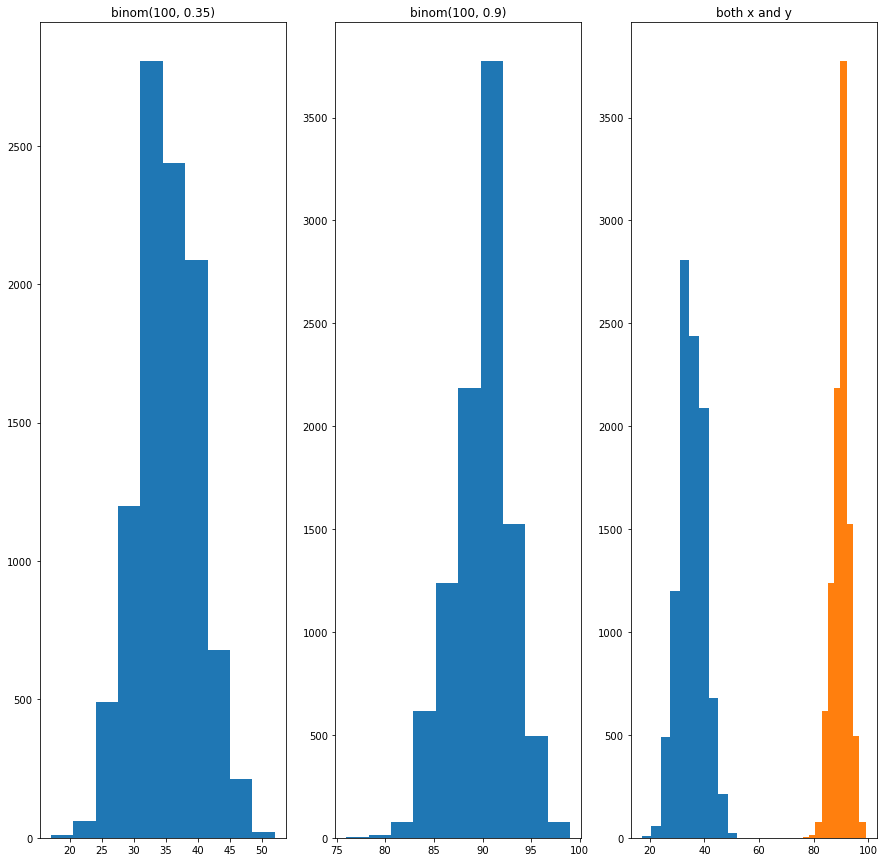

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].hist(x)
ax[0].title.set_text('binom(100, 0.35)')

ax[1].hist(y)
ax[1].title.set_text('binom(100, 0.9)')

ax[2].hist(x)
ax[2].hist(y)
ax[2].title.set_text('both x and y')

# Theoretical expected values:
# bin(100, 0.35): 100*0.35 = 35. 
# bin(100, 0.9): 100*0.9 = 90.

# Theoretical Variances:
# bin(100, 0.35): 100*0.35*(1-0.35) = 22.75.
# bin(100, 0.9): 100*0.9*(1-0.9) = 9.

print('Mean of X: ', np.mean(x))
print('Mean of Y: ', np.mean(y))

print('Variance of X: ', np.var(x))
print('Variance of Y: ', np.var(y))

